built in python 2 and requires MySQL. (uses my env_web conda env)

Reading in from tester002 (me running through 7 episodes)

In [105]:
import os
from PIL import Image
from io import BytesIO
import json
import base64
import MySQLdb
import _mysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Downloading JSON of a Single Episode

In [2]:
## Connect to DB
db=_mysql.connect(host="christest.c5s5wgavsyu2.us-west-2.rds.amazonaws.com",user="christest",
                  passwd="gags1313",db="chrisdb")


In [3]:
# get the header
db.query("""SELECT column_name FROM information_schema.columns WHERE table_name = 'web_experiments_crystalquest_wave'""")
r=db.store_result() # sends the whole results
header = r.fetch_row(0)
header = [hh[0] for hh in header]
print(header)

['id', 'save_time', 'wave', 'MID', 'AID', 'HID', 'session_id']


In [5]:
db.query("""SELECT * FROM web_experiments_crystalquest_wave WHERE (MID LIKE "tester002%")""")
r=db.store_result() # sends the whole results
rows = r.fetch_row(100)


In [6]:
MID = rows[0][header.index('MID')]
print(MID)
print(rows[0][header.index('save_time')])

tester002
2017-11-04 09:03:52


In [7]:
print(rows[0][header.index('save_time')].replace(' ','_'))

2017-11-04_09:03:52


In [8]:
# make dir for subject
diir='../data/'+str(rows[0][header.index('MID')])
if not os.path.isdir(diir):
    os.mkdir(diir)

In [9]:
# save out json
date_for_save = rows[0][header.index('save_time')].replace(' ','_')
filename=diir+'/'+date_for_save+'_data.json'
obj = json.loads(rows[0][header.index('wave')])
with open(filename, 'w') as outfile:
        json.dump(obj, outfile)

In [11]:
os.listdir('../data/tester002/')

['2017-11-04_09:03:52_data.json']

In [12]:
# load back in 
with open(filename) as data_file:    
    data = json.load(data_file)

In [13]:
data['30']['clock_time']

u'00:06'

### Making a movie

In [14]:
# takes a few seconds # 
for key in data.keys():
    if key!='guid':
        im = Image.open(BytesIO(base64.b64decode(data[key]['screen_image'].split(',')[-1])))
        im.save(diir+'/'+date_for_save+'{0:04d}'.format(int(key))+'.png', 'png')


In [15]:
print(diir)
print(date_for_save)
#print(MID)



../data/tester002
2017-11-04_09:03:52


In [21]:
%%bash 
ffmpeg -f image2 -r 10 -i ../data/tester002/2017-11-04_09:03:52%04d.png -vcodec mpeg4 -y ../data/tester002/movie.mp4

ffmpeg version 3.3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.1.0 (clang-802.0.42)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.3.4 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma --enable-vda
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.100 / 57.  6.100
  libavfilter     6. 82.100 /  6. 82.100
  libavresample   3.  5.  0 /  3.  5.  0
  libswscale      4.  6.100 /  4.  6.100
  libswresample   2.  7.100 /  2.  7.100
  libpostproc    54.  5.100 / 54.  5.100
Input #0, image2, from '../data/tester002/2017-11-04_09:03:52%04d.png':
  Duration: 00:00:06.10, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 780x500, 10 f

### Extract Game Info

{u'alien_positions': [[585.3155207232467, 425.1616228792085]],
 u'asteroid_positions': [[100, 106], [412, 318], [522, 448], [543, 96]],
 u'asteroid_width': 20,
 u'clock_time': u'00:06',
 u'crystal_positions': [[571.5, 119.5], [509.5, 279.5], [352.5, 31.5]],
 u'elapsed_time': 6007,
 u'game': 0,
 u'lives': 2,
 u'points': [],
 u'screen_dim': [780, 500],
 u'screen_image': u'',
 u'ship_position': [574, 224],
 u'wave': 1}
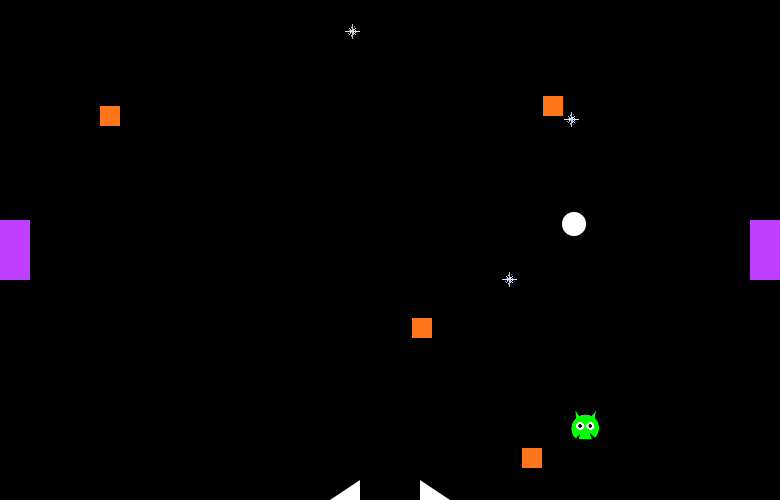

In [28]:
data['30']

In [34]:
screen_dim = data[data.keys()[0]]['screen_dim']
crystal_positions = data[data.keys()[0]]['crystal_positions']
asteroid_positions = data[data.keys()[0]]['asteroid_positions']

62

In [41]:
ship_pos = np.empty((len(data.keys()),3))
for key in data.keys():
    if key!='guid':
        ship_pos[key,0]=key
        ship_pos[key,1]=data[key]['ship_position'][0]
        ship_pos[key,2]=data[key]['ship_position'][1]
    

/Users/chris/anaconda/envs/env_web/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  after removing the cwd from sys.path.
/Users/chris/anaconda/envs/env_web/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """
/Users/chris/anaconda/envs/env_web/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


In [121]:
pd.DataFrame(ship_pos,columns=['timestep','x','y']).head(10)

,timestep,x,y
0,0.0,2.470328e-323,0.0
1,1.0,2.880000e+02,352.0
2,2.0,2.880000e+02,352.0
3,3.0,2.880000e+02,352.0
4,4.0,2.620000e+02,352.0
5,5.0,2.580000e+02,388.0
6,6.0,2.580000e+02,428.0
7,7.0,2.320000e+02,442.0
8,8.0,1.920000e+02,442.0
9,9.0,1.520000e+02,442.0


### Build a grid and make a simple movie for the wave 

In [120]:
time_steps

62

In [133]:
# make the grid x time
discretize_size = 20 
time_steps = len(ship_pos)
grid_size = tuple(np.array(screen_dim)/20)
grid = np.zeros(grid_size+(time_steps,))
last_pos = [0,0]
for time_step in range(time_steps):
    grid[last_pos[0],last_pos[1],time_step]=0
    discretized_pos = np.round(ship_pos[time_step,1:3]/discretize_size).astype('int')
    #print(discretized_pos)
    grid[discretized_pos[0],discretized_pos[1],time_step]=1
    last_pos = discretized_pos
    
np.save(diir+'/'+'testgrid.npy',grid)

In [ ]:
# see function 
# grid_movie_tester002.py
# to plot a movie of this grid. 